In [7]:
from pathlib import Path
import pandas as pd

In [89]:
label = pd.read_csv('seoul_crime_label.csv')
#label.set_index('GU', inplace=True)
label.head()

,GU,Total,Murder,Robbery,Rape,Theft,Violence,Total_level,Murder_level,Robbery_level,Rape_level,Theft_level,Violence_level
0,종로,19154,32,39,1157,7765,10161,B,D,D,C,C,B
1,중,20536,10,39,1053,9695,9739,C,A,D,C,D,B
2,용산,17890,14,26,1411,6041,10398,B,A,B,D,A,C
3,성동,13124,18,23,610,5353,7120,A,A,A,A,A,A
4,광진,21495,23,36,1297,10164,9975,D,B,D,D,D,B


In [90]:
label = label[['GU','Total_level','Murder_level','Robbery_level','Rape_level','Theft_level','Violence_level']]
label.head(3)

,GU,Total_level,Murder_level,Robbery_level,Rape_level,Theft_level,Violence_level
0,종로,B,D,D,C,C,B
1,중,C,A,D,C,D,B
2,용산,B,A,B,D,A,C


In [91]:
seoul = {'강남':'Gangnam','강동':'Gangdong','강북':'Gangbuk','강서':'Gangseo',
        '관악':'Gwanak','광진':'Gwangjin','구로':'Guro','금천':'Geumcheon',
        '노원':'Nowon','도봉':'Dobong','동대문':'Dongdaemun','동작':'Dongjak',
        '마포':'Mapo','서대문':'Seodaemun','서초':'Seocho','성동':'Seongdong',
        '성북':'Seongbuk','송파':'Songpa','양천':'Yangcheon','영등포':'Yeongdeungpo',
        '은평':'Eunpyeong', '종로':'Jongno','중':'Jung','중랑':'Jungnang',
        '용산':'Yongsan'}
label['GU_eng'] = label['GU'].map(seoul)
label.head()

,GU,Total_level,Murder_level,Robbery_level,Rape_level,Theft_level,Violence_level,GU_eng
0,종로,B,D,D,C,C,B,Jongno
1,중,C,A,D,C,D,B,Jung
2,용산,B,A,B,D,A,C,Yongsan
3,성동,A,A,A,A,A,A,Seongdong
4,광진,D,B,D,D,D,B,Gwangjin


In [92]:
base = Path.cwd()/'cropped_img_data'
path_list = []
for folder in base.iterdir() :    
    for file in folder.iterdir() :
        path_list.append([file,file.stem.split('_')[0]])

In [93]:
file_path = pd.DataFrame(path_list, columns=['Path','GU'])
file_path

,Path,GU
0,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong
1,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong
2,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong
3,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong
4,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong
...,...,...
2658,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan
2659,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan
2660,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan
2661,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan


In [94]:
df = file_path.merge(label, how='left', left_on='GU', right_on='GU_eng')
df.head()

,Path,GU_x,GU_y,Total_level,Murder_level,Robbery_level,Rape_level,Theft_level,Violence_level,GU_eng
0,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong
1,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong
2,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong
3,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong
4,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong


In [81]:
df

,Path,GU_x,GU_y,Total_level,Murder_level,Robbery_level,Rape_level,Theft_level,Violence_level,GU_eng
0,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong
1,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong
2,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong
3,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong
4,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong
...,...,...,...,...,...,...,...,...,...,...
2658,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan,용산,B,A,B,D,A,C,Yongsan
2659,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan,용산,B,A,B,D,A,C,Yongsan
2660,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan,용산,B,A,B,D,A,C,Yongsan
2661,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan,용산,B,A,B,D,A,C,Yongsan


In [67]:
df.groupby(df['Rape_level']).size()

Rape_level
A    543
B    544
C    563
D    505
E    508
dtype: int64

In [68]:
df.groupby(df['Total_level']).size()

Total_level
A    545
B    502
C    565
D    543
E    508
dtype: int64

In [69]:
df.groupby(df['Robbery_level']).size()

Robbery_level
A    738
B    300
C    562
D    548
E    515
dtype: int64

In [82]:
df.groupby(['Robbery_level','GU_eng'])['Path'].count()

Robbery_level  GU_eng      
A              Dobong          104
               Dongjak         102
               Eunpyeong       100
               Seodaemun       115
               Seongbuk        110
               Seongdong       107
               Yangcheon       100
B              Mapo            100
               Nowon           100
               Yongsan         100
C              Dongdaemun      122
               Gangbuk         100
               Gangseo         100
               Guro            127
               Jungnang        113
D              Geumcheon       109
               Gwangjin        103
               Jongno          100
               Jung            136
               Yeongdeungpo    100
E              Gangdong        107
               Gangnam         108
               Gwanak          100
               Seocho          100
               Songpa          100
Name: Path, dtype: int64

In [70]:
df.groupby(df['Violence_level']).size()

Violence_level
A    538
B    548
C    529
D    540
E    508
dtype: int64

In [71]:
df.groupby(df['Theft_level']).size()

Theft_level
A    520
B    527
C    542
D    566
E    508
dtype: int64

In [72]:
df.groupby(df['Murder_level']).size()

Murder_level
A    549
B    525
C    519
D    543
E    527
dtype: int64

In [95]:
seoul_district = {'Gangnam':'East-South','Gangdong':'East-South','Gangbuk':'East-North','Gangseo':'West-South',
        'Gwanak':'West-South','Gwangjin':'East-North','Guro':'West-South','Geumcheon':'West-South',
        'Nowon':'East-North','Dobong':'East-North','Dongdaemun':'East-North','Dongjak':'West-South',
        'Mapo':'West-North','Seodaemun':'West-North','Seocho':'East-South','Seongdong':'East-North',
        'Seongbuk':'East-North','Songpa':'East-South','Yangcheon':'West-South','Yeongdeungpo':'West-South',
        'Eunpyeong':'West-North', 'Jongno':'Center','Jung':'Center','Jungnang':'East-North',
        'Yongsan':'Center'}
df['district'] = df['GU_eng'].map(seoul_district)

In [96]:
df

,Path,GU_x,GU_y,Total_level,Murder_level,Robbery_level,Rape_level,Theft_level,Violence_level,GU_eng,district
0,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong,East-North
1,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong,East-North
2,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong,East-North
3,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong,East-North
4,C:\Users\dhtjd\ECO5320\cropped_img_data\Dobong...,Dobong,도봉,A,A,A,A,A,A,Dobong,East-North
...,...,...,...,...,...,...,...,...,...,...,...
2658,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan,용산,B,A,B,D,A,C,Yongsan,Center
2659,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan,용산,B,A,B,D,A,C,Yongsan,Center
2660,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan,용산,B,A,B,D,A,C,Yongsan,Center
2661,C:\Users\dhtjd\ECO5320\cropped_img_data\Yongsa...,Yongsan,용산,B,A,B,D,A,C,Yongsan,Center


In [98]:
df.groupby(df['district']).size()

district
Center        336
East-North    859
East-South    415
West-North    315
West-South    738
dtype: int64

<AxesSubplot:xlabel='district'>

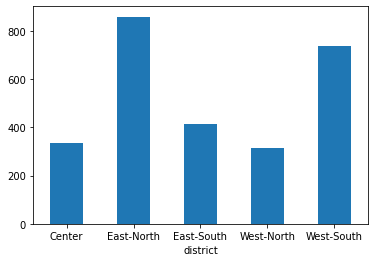

In [101]:
df_by_group = df.groupby(df['district']).size()
df_by_group.plot.bar(x='group',y='xval',rot=0)